<a href="https://colab.research.google.com/github/abhinav-m/data-science-bootcamp/blob/master/Udemy-Machine-Learning-A-Z/Part-6-Reinforcement-Learning/Part-6-1-Upper-Confidence-Bound/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## Importing the dataset

In [17]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [18]:
import math
# Number of users / Rounds to run
N = 1000
# Number of ads
d = 10
# Ads selected over round
ads_selected = []
# Number of times each ad was selected
number_of_selections = [0] * d
# Sums of rewards upto round n
sum_of_rewards = [0] * d
# Total reward accumulated
total_reward = 0

for n in range(0,N):
  # Initialising ad as 0
  ad = 0
  # Maximum UCB so far
  max_upper_bound = 0
  for i in range(0,d):
    # Calculating average reward for current ad
    if (number_of_selections[i] > 0):
      average_reward = sum_of_rewards[i] / number_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1 ) / number_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      # Setting max upper bound if ad was not selected yet
      upper_bound  = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  number_of_selections[ad] += 1
  # Reward by user n , of ad 
  reward = dataset.values[n,ad]
  sum_of_rewards[ad] += reward
  total_reward = total_reward + reward
    
    

## Visualising the results

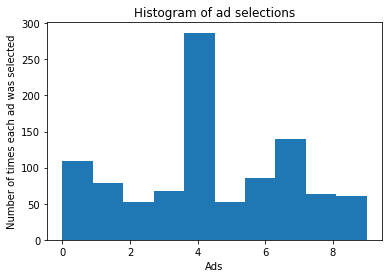

In [19]:
plt.hist(ads_selected)
plt.title('Histogram of ad selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()